In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('movie_reviws')
nltk.download('punkt')

from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

In [7]:
roteiro = open('data/SW_EpisodeV_ptBR.txt', 'r')

roteiro_csv = open('data/roteiroV.csv', 'w')

ct = 0
for i in roteiro:
    x = i.split(f'"')

    if ct != 0:
        roteiro_csv.write(f'"{x[3]}";"{x[5]}"\n')
    else:
        roteiro_csv.write(f'"{x[1]}";"{x[3]}"\n')
    ct+=1

roteiro_csv.close()
roteiro.close()

In [8]:
df = pd.read_csv('data/roteiroVen.csv', sep=";")
top5 = df['character'].value_counts().keys()[0:5]

dict_falas_en = {}

for i in top5:
    dict_falas_en[f'{i}'] = df.loc[(df['character'] == i), ['dialogue']]

In [ ]:
cols = ('character', 'dialogue', 'class', 'pos_value', 'neg_value')
df_sents = pd.DataFrame(columns = cols)

for i in dict_falas_en:
    for j in dict_falas_en[i]['dialogue']:
            pos = TextBlob(j, analyzer=NaiveBayesAnalyzer()).sentiment[1]
            neg = 1 - pos
            prob = ''
            
            if pos >= 0.75:
                prob = 'pos'
            elif pos <= 0.25:
                prob = 'neg'
            else:
                prob = 'neu'

            linha = pd.Series({'character': i, 'dialogue': j, 'class': prob, 'pos_value': pos, 'neg_value': neg})
            df_sents = pd.concat([df_sents, pd.DataFrame([linha], columns=linha.index)])

In [ ]:
# df_sents.to_csv('data/roteiroVclassificado.csv')

In [9]:
df = pd.read_csv('data/roteiroVclassificado.csv', sep=";").dropna()

In [10]:
def percent(personagem, value):
    x = df.loc[(df['character'] == personagem), [value]]
    ct = count = 0

    for i in x[value]:
        ct += float(i)
        count += 1
    
    return round(ct / count, 2)

In [11]:
estatisticas = {}

for i in df['character'].value_counts().keys():
    estatisticas[i] = {
        'pos': df.loc[(df['character'] == i) & (df['class'] == 'pos'), ['class']].value_counts(),
        'pos_percent': percent(i, 'pos_value') * 100,
        'neg': df.loc[(df['character'] == i) & (df['class'] == 'neg'), ['class']].value_counts(),
        'neg_percent': percent(i, 'neg_value') * 100,
        'neu': df.loc[(df['character'] == i) & (df['class'] == 'neu'), ['class']].value_counts(),
    }

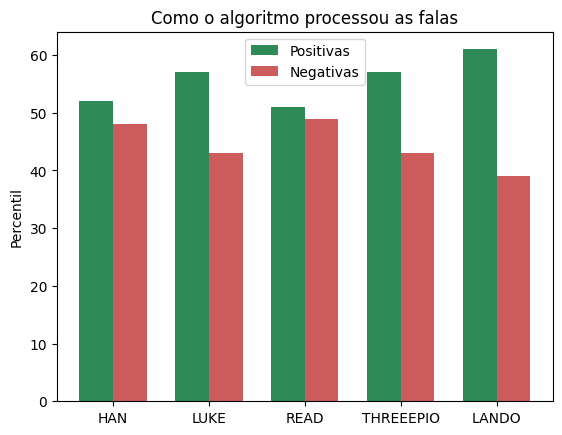

In [12]:
posPercent = negPercent = ()

for i in top5:
    posPercent = posPercent + (estatisticas[i]['pos_percent'],)
    negPercent = negPercent + (estatisticas[i]['neg_percent'],)

ind = np.arange(5)  
width = 0.35

fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, posPercent, width, color='seagreen')
rects2 = ax.bar(ind+width, negPercent, width, color='indianred')

ax.set_ylabel('Percentil')
ax.set_title('Como o algoritmo processou as falas')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(top5)

ax.legend( (rects1[0], rects2[0]), ('Positivas', 'Negativas') )

plt.show()

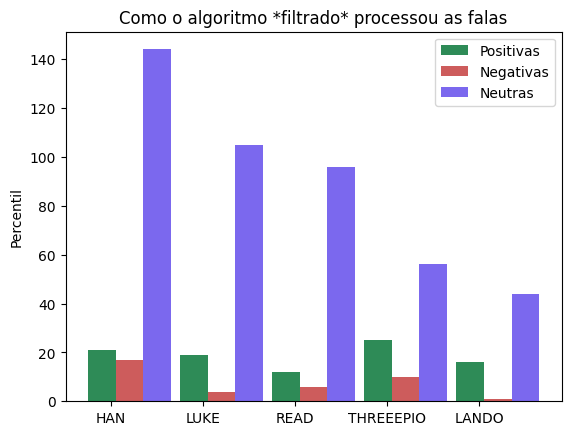

In [13]:
qtdPos = qtdNeg = qtdNeu = ()

for i in top5:  
    qtdPos = qtdPos + (estatisticas[i]['pos'][0],)
    qtdNeg = qtdNeg + (estatisticas[i]['neg'][0],)
    qtdNeu = qtdNeu + (estatisticas[i]['neu'][0],)

ind = np.arange(5)  
width = 0.30

fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, qtdPos, width, color='seagreen')
rects2 = ax.bar(ind+width, qtdNeg, width, color='indianred')
rects3 = ax.bar(ind+width*2, qtdNeu, width, color='mediumslateblue')

ax.set_ylabel('Percentil')
ax.set_title('Como o algoritmo *filtrado* processou as falas')
ax.set_xticks(ind + width / 3)
ax.set_xticklabels(top5)

ax.legend((rects1[0], rects2[0], rects3[0],), ('Positivas', 'Negativas', 'Neutras'))

plt.show()